# Importing Librariess

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load and Understand the Dataset

In [2]:
df = pd.read_csv('./data/blood_samples_dataset.csv')
df_test = pd.read_csv('./data/blood_samples_dataset_test.csv')

In [3]:
df.head()

,Mean Corpuscular Volume,Glucose,Hemoglobin,Cholesterol,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,85.536753,109.053740,12.567491,156.0,168.0,6.534200,5.025049,34.082432,28.593950,32.106823,...,6.295384,97.0,42.0,30.941938,33.087828,78.0,0.823069,0.004965,2.319005,Anemia
1,79.457932,115.734172,12.170873,201.0,318.0,7.234492,5.007686,35.401511,26.472570,32.855136,...,4.500000,119.0,43.0,15.180750,14.351752,65.0,0.999855,0.005715,2.585100,Thalasse
2,84.263298,101.972334,13.157210,191.0,258.0,6.205511,4.720903,35.131177,29.478237,31.237885,...,4.930239,120.0,58.0,16.409735,18.029298,70.0,0.991044,0.000000,2.186562,Anemia
3,78.878756,86.288770,11.277217,206.0,163.0,5.095636,4.552511,35.391450,31.277737,33.154248,...,5.347854,122.0,53.0,29.942254,28.959447,66.0,0.787548,0.008022,2.532534,Anemia
4,75.611732,104.261134,13.630299,199.0,215.0,6.470389,5.247132,36.631049,22.683155,32.047112,...,4.844588,118.0,67.0,NaN,15.807819,74.0,0.759312,0.009144,0.862582,Thalasse


### Shape of data

In [4]:
df.shape

(8261, 25)

### Information about data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8261 entries, 0 to 8260
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Mean Corpuscular Volume                    7919 non-null   float64
 1   Glucose                                    7930 non-null   float64
 2   Hemoglobin                                 7949 non-null   float64
 3   Cholesterol                                7945 non-null   float64
 4   Platelets                                  7936 non-null   float64
 5   White Blood Cells                          7917 non-null   float64
 6   Red Blood Cells                            7936 non-null   float64
 7   Hematocrit                                 7930 non-null   float64
 8   Mean Corpuscular Hemoglobin                7904 non-null   float64
 9   Mean Corpuscular Hemoglobin Concentration  7927 non-null   float64
 10  Insulin                 

In [6]:
df['Disease'].unique()

array(['Anemia', 'Thalasse', 'Diabetes', 'Healthy', 'Thromboc'],
      dtype=object)

# EDA

## Exploratory Data Analysis (EDA)

In [7]:
# 1) Imports, style, and load data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

sns.set_theme(style="whitegrid", context="notebook")

df = pd.read_csv("data/blood_samples_dataset.csv")
print("Shape:", df.shape)
df.head(3)

Shape: (8261, 25)


,Mean Corpuscular Volume,Glucose,Hemoglobin,Cholesterol,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,85.536753,109.053740,12.567491,156.0,168.0,6.534200,5.025049,34.082432,28.593950,32.106823,...,6.295384,97.0,42.0,30.941938,33.087828,78.0,0.823069,0.004965,2.319005,Anemia
1,79.457932,115.734172,12.170873,201.0,318.0,7.234492,5.007686,35.401511,26.472570,32.855136,...,4.500000,119.0,43.0,15.180750,14.351752,65.0,0.999855,0.005715,2.585100,Thalasse
2,84.263298,101.972334,13.157210,191.0,258.0,6.205511,4.720903,35.131177,29.478237,31.237885,...,4.930239,120.0,58.0,16.409735,18.029298,70.0,0.991044,0.000000,2.186562,Anemia


In [8]:
# 2) Missing values and simple imputation
missing = df.isna().mean().sort_values(ascending=False)
print("Top missing columns:")
display(missing.head(10))

num_cols = df.select_dtypes(include=np.number).columns.tolist()
imp = SimpleImputer(strategy="median")
df_imp = df.copy()
df_imp[num_cols] = imp.fit_transform(df[num_cols])

Top missing columns:


Triglycerides                                0.044305
Systolic Blood Pressure                      0.043336
Mean Corpuscular Hemoglobin                  0.043215
AST                                          0.042005
White Blood Cells                            0.041641
Mean Corpuscular Volume                      0.041399
Heart Rate                                   0.041278
C-reactive Protein                           0.041278
Mean Corpuscular Hemoglobin Concentration    0.040431
Diastolic Blood Pressure                     0.040310
dtype: float64

C:\Users\henry\AppData\Local\Temp\ipykernel_26148\1879410908.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x="Disease", order=df["Disease"].value_counts().index, palette="Set2")


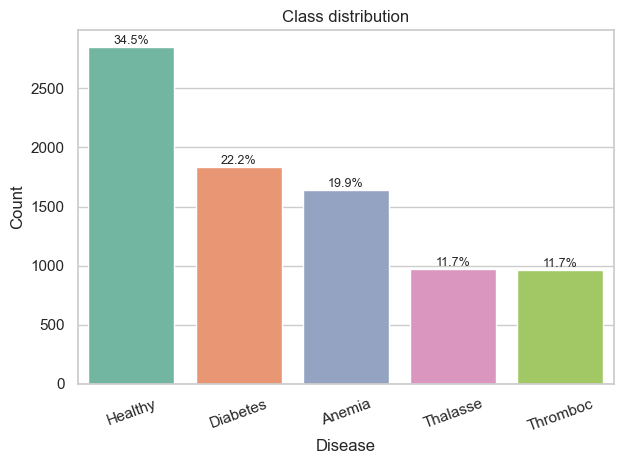

,count,percent
Disease,,
Healthy,2850,34.50
Diabetes,1834,22.20
Anemia,1641,19.86
Thalasse,970,11.74
Thromboc,966,11.69


In [9]:
# 3) Target (Disease) distribution
ax = sns.countplot(data=df, x="Disease", order=df["Disease"].value_counts().index, palette="Set2")
ax.set_title("Class distribution")
ax.set_xlabel("Disease")
ax.set_ylabel("Count")
for p in ax.patches:
    h = p.get_height()
    if h:
        ax.text(p.get_x() + p.get_width()/2, h, f"{100*h/len(df):.1f}%", ha="center", va="bottom", fontsize=9)
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

counts = df["Disease"].value_counts()
props = (counts / len(df) * 100).round(2)
display(pd.DataFrame({"count": counts, "percent": props}))

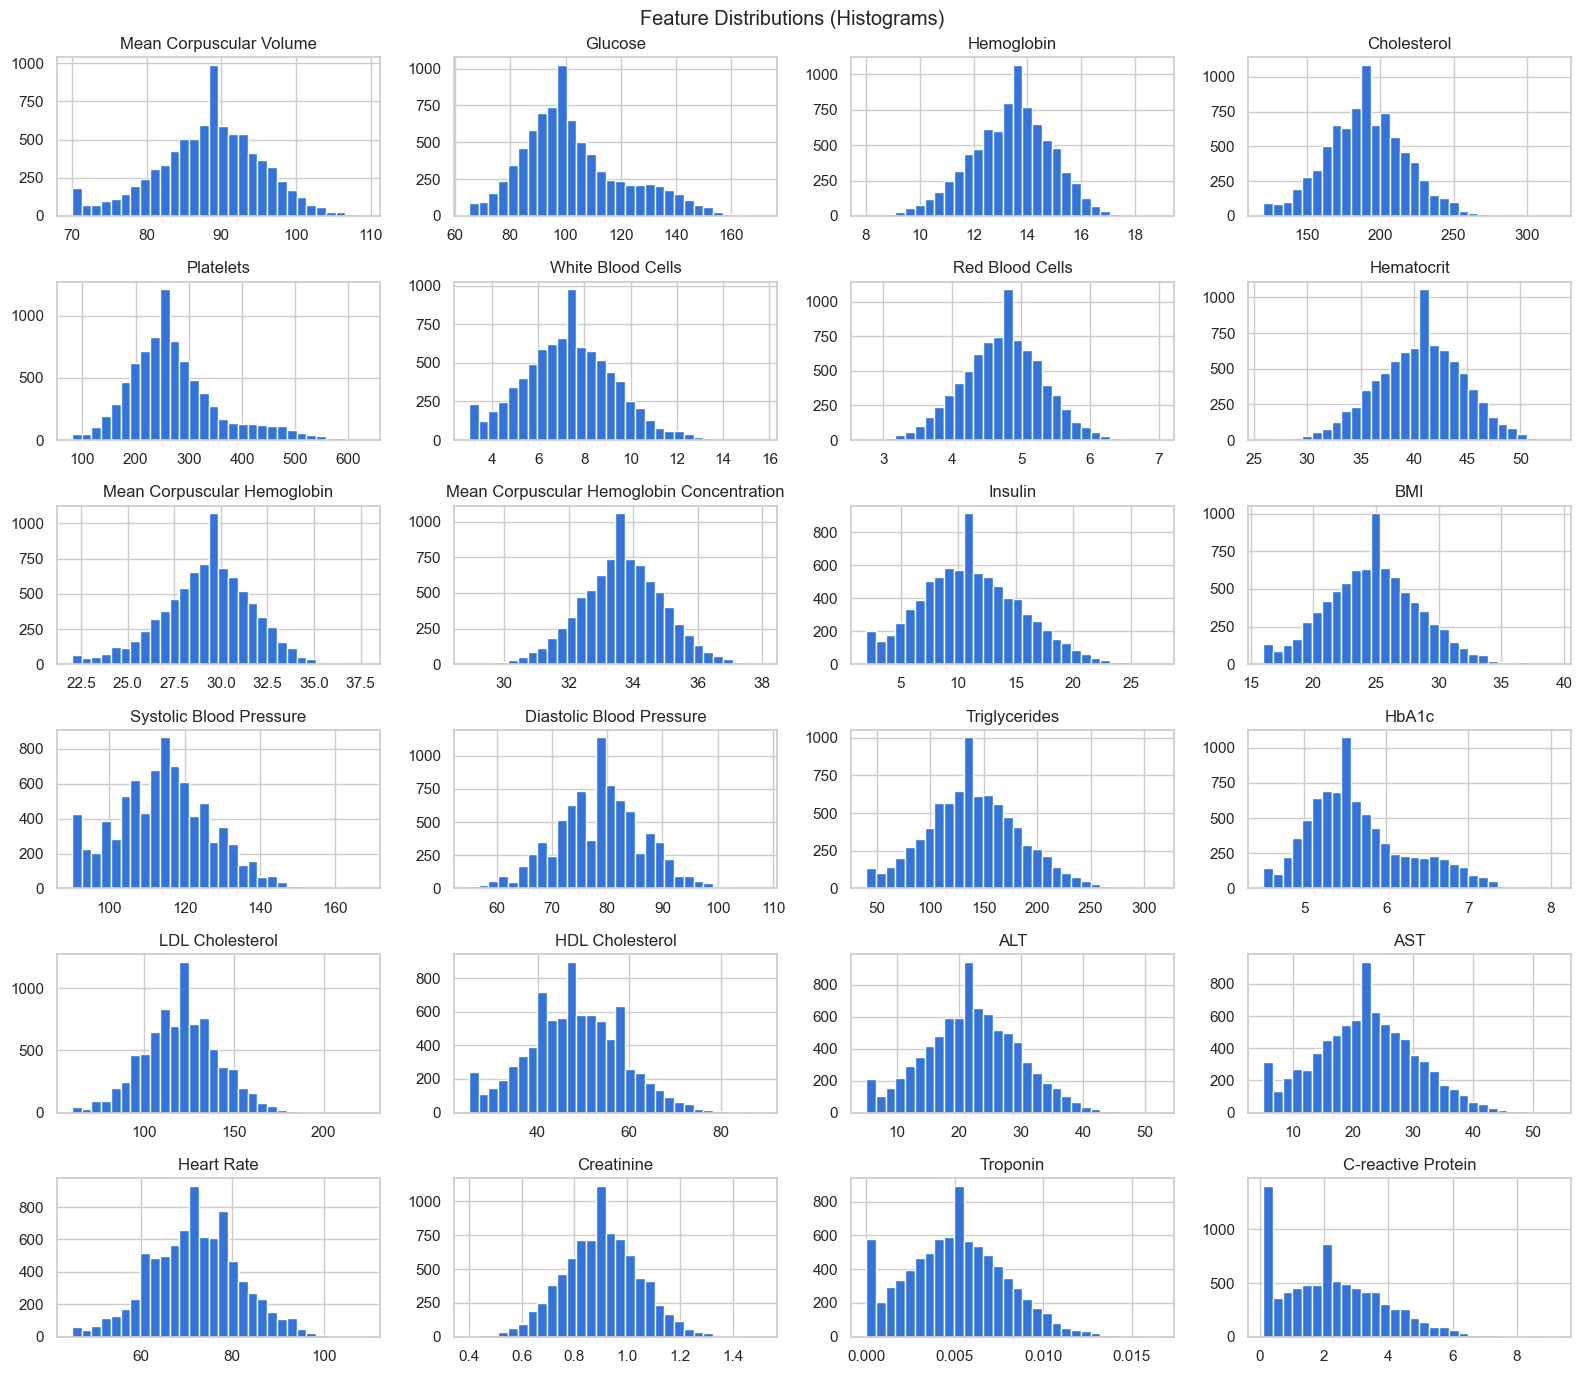

In [10]:
# 4) Feature distributions (histograms)
num_cols = df_imp.select_dtypes(include=np.number).columns
axes = df_imp[num_cols].hist(figsize=(16, 14), bins=30, layout=(int(np.ceil(len(num_cols)/4)), 4), color="#3273dc")
plt.suptitle("Feature Distributions (Histograms)")
plt.tight_layout()
plt.show()

C:\Users\henry\AppData\Local\Temp\ipykernel_26148\1581660651.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


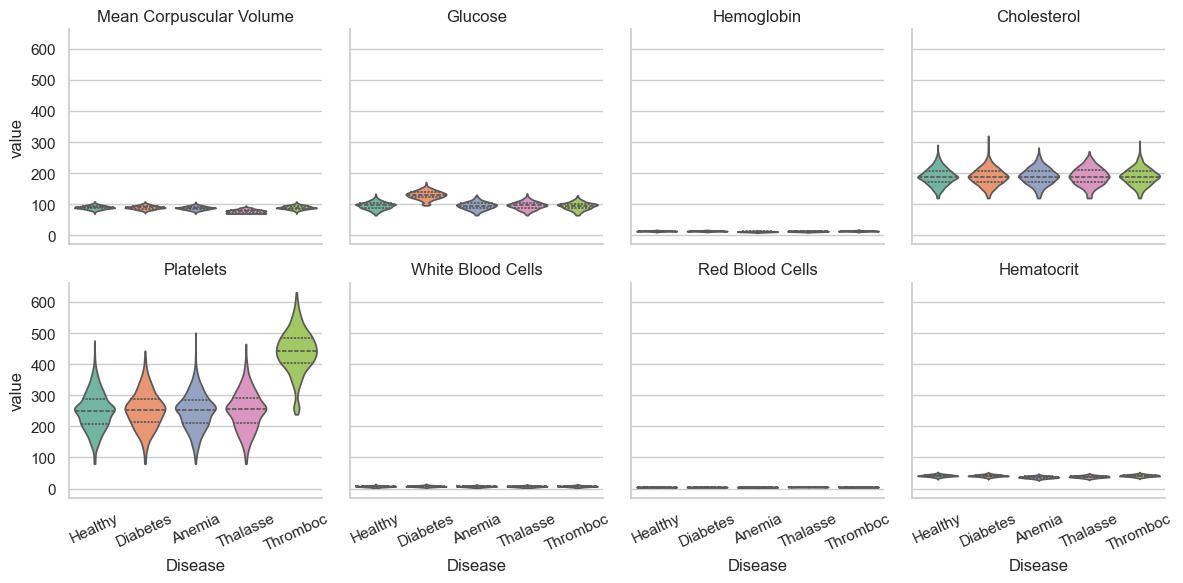

C:\Users\henry\AppData\Local\Temp\ipykernel_26148\1581660651.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


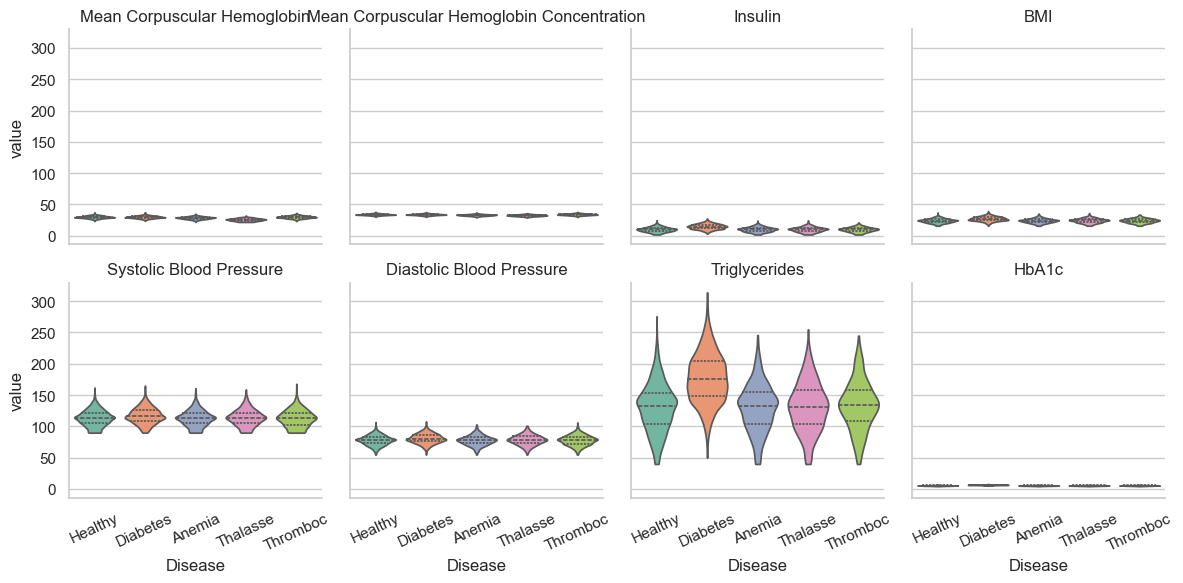

C:\Users\henry\AppData\Local\Temp\ipykernel_26148\1581660651.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


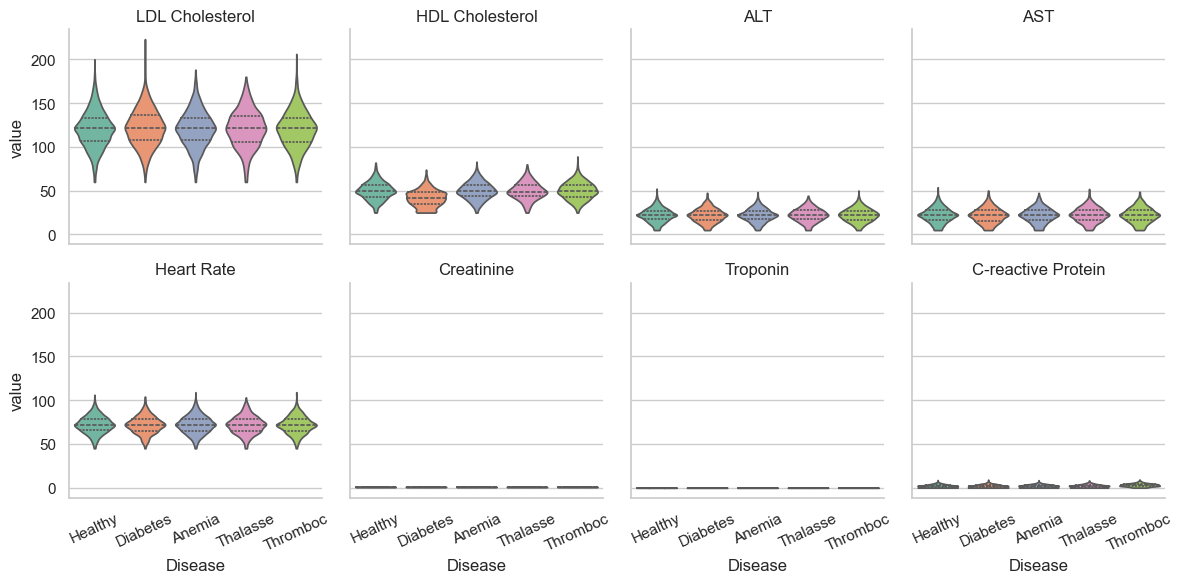

In [11]:
# 5) Feature–target relationships (violin plots)
num_cols = df_imp.select_dtypes(include=np.number).columns.tolist()
order = df["Disease"].value_counts().index

# Plot in small batches to keep it readable
step = 8
for i in range(0, len(num_cols), step):
    cols = num_cols[i:i+step]
    df_long = df_imp[cols + ["Disease"]].melt(id_vars=["Disease"], var_name="feature", value_name="value")
    g = sns.catplot(
        data=df_long, x="Disease", y="value", col="feature", col_wrap=4,
        kind="violin", order=order, inner="quartile", cut=0, height=3.0, aspect=1.0, palette="Set2"
    )
    g.set_titles("{col_name}")
    for ax in g.axes.flatten():
        ax.tick_params(axis="x", rotation=25)
    plt.tight_layout()
    plt.show()

In [12]:
# Tune n_estimators by CV, then run RFECV with the best value
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.feature_selection import RFECV
import numpy as np
import pandas as pd

y = df['Disease'].astype('category').cat.codes
X = df.drop(columns=['Disease']).select_dtypes(include=np.number)
X_filled = X.fillna(X.median())

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

n_list = [100, 200, 300, 400, 600, 800, 1000]
scores = []
for n in n_list:
    rf = RandomForestClassifier(n_estimators=n, random_state=42,
                                class_weight='balanced_subsample', n_jobs=1)
    s = cross_val_score(rf, X_filled, y, cv=cv, scoring='recall_macro', n_jobs=1).mean()
    scores.append(s)

res = pd.DataFrame({'n_estimators': n_list, 'recall_macro': np.round(scores, 4)})
best_idx = int(np.argmax(scores))
best_n = n_list[best_idx]

print("n_estimators CV (recall_macro):")
display(res)
print(f"Best n_estimators: {best_n} (recall_macro={scores[best_idx]:.4f})")

n_estimators CV (recall_macro):


,n_estimators,recall_macro
0,100,0.8780
1,200,0.8827
2,300,0.8819
3,400,0.8816
4,600,0.8820
5,800,0.8815
6,1000,0.8814


Best n_estimators: 200 (recall_macro=0.8827)


In [13]:
# Compare classifiers with 5-fold CV by macro recall, pick best
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import recall_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier, HistGradientBoostingClassifier
import pandas as pd
import numpy as np

cols_pref = [
    'Mean Corpuscular Volume','Glucose','Hemoglobin','Platelets','Red Blood Cells',
    'Hematocrit','Mean Corpuscular Hemoglobin','Mean Corpuscular Hemoglobin Concentration',
    'Insulin','Triglycerides','HbA1c'
]
cols = [c for c in cols_pref if c in df.columns]
if not cols:
    cols = df.select_dtypes(include=np.number).columns.tolist()

X = df[cols]
y = df['Disease']

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = {'recall_macro': 'recall_macro'}

models = {
    'LogReg': Pipeline([('imp', SimpleImputer(strategy='median')),
                        ('sc', StandardScaler()),
                        ('clf', LogisticRegression(max_iter=2000, class_weight='balanced'))]),
    'LinearSVC': Pipeline([('imp', SimpleImputer(strategy='median')),
                           ('sc', StandardScaler()),
                           ('clf', LinearSVC(class_weight='balanced'))]),
    'SVC_rbf': Pipeline([('imp', SimpleImputer(strategy='median')),
                         ('sc', StandardScaler()),
                         ('clf', SVC(kernel='rbf', class_weight='balanced'))]),
    'KNN': Pipeline([('imp', SimpleImputer(strategy='median')),
                     ('sc', StandardScaler()),
                     ('clf', KNeighborsClassifier(n_neighbors=15))]),
    'RandomForest': Pipeline([('imp', SimpleImputer(strategy='median')),
                              ('clf', RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced_subsample'))]),
    'ExtraTrees': Pipeline([('imp', SimpleImputer(strategy='median')),
                            ('clf', ExtraTreesClassifier(n_estimators=400, random_state=42, class_weight='balanced'))]),
    'HistGB': Pipeline([('imp', SimpleImputer(strategy='median')),
                        ('clf', HistGradientBoostingClassifier(random_state=42))]),
    'AdaBoost': Pipeline([('imp', SimpleImputer(strategy='median')),
                          ('clf', AdaBoostClassifier(random_state=42))]),
    'GradBoost': Pipeline([('imp', SimpleImputer(strategy='median')),
                           ('clf', GradientBoostingClassifier(random_state=42))]),
}

rows = []
for name, pipe in models.items():
    cvres = cross_validate(pipe, X, y, cv=cv, scoring=scoring, n_jobs=1, return_train_score=False)
    rows.append({'model': name, 'recall_macro_mean': float(np.mean(cvres['test_recall_macro'])), 'recall_macro_std': float(np.std(cvres['test_recall_macro']))})

report = pd.DataFrame(rows).sort_values('recall_macro_mean', ascending=False).reset_index(drop=True)
display(report)

best_name = report.iloc[0]['model']
best_model = models[best_name].fit(X, y)
print(f"Best model by CV macro recall: {best_name}")

if 'df_test' in globals():
    X_te = df_test[cols]
    y_te = df_test['Disease']
    y_pred = best_model.predict(X_te)
    print('Test macro recall:', round(recall_score(y_te, y_pred, average='macro'), 4))
    print(classification_report(y_te, y_pred, zero_division=0))

,model,recall_macro_mean,recall_macro_std
0,LogReg,0.900177,0.004498
1,SVC_rbf,0.895177,0.003173
2,LinearSVC,0.894710,0.006152
3,GradBoost,0.884279,0.008193
4,HistGB,0.884221,0.005176
5,ExtraTrees,0.884087,0.007565
6,RandomForest,0.882553,0.009215
7,KNN,0.871904,0.005029
8,AdaBoost,0.836785,0.015667


Best model by CV macro recall: LogReg
Test macro recall: 0.9107
              precision    recall  f1-score   support

      Anemia       0.85      0.87      0.86       410
    Diabetes       0.97      0.97      0.97       459
     Healthy       0.92      0.83      0.87       713
    Thalasse       0.82      0.95      0.88       242
    Thromboc       0.84      0.94      0.89       242

    accuracy                           0.89      2066
   macro avg       0.88      0.91      0.89      2066
weighted avg       0.90      0.89      0.89      2066

